In [63]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#upload dataset 
df=pd.read_csv("Test.csv")
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

# EXPLORATORY DATA ANALYSIS

In [65]:
#to check how big is your data?
df.shape

(5681, 11)

In [66]:
#to check the datatype of columns of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [67]:
# if there are any missing values- it give true for those values 
df.isnull()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               False        False             False            False   
1               False        False             False            False   
2               False        False             False            False   
3               False        False             False            False   
4               False         True             False            False   
...               ...          ...               ...              ...   
5676            False        False             False            False   
5677            False        False             False            False   
5678            False        False             False            False   
5679            False        False             False            False   
5680            False        False             False            False   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0         False     False              False                      False   
1         False     False              False                      False   
2         False     False              False                      False   
3         False     False              False                      False   
4         False     False              False                      False   
...         ...       ...                ...                        ...   
5676      False     False              False                      False   
5677      False     False              False                      False   
5678      False     False              False                      False   
5679      False     False              False                      False   
5680      False     False              False                      False   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0           False                 False        False  
1            True                 False        False  
2            True                 False        False  
3            True                 False        False  
4           False                 False        False  
...           ...                   ...          ...  
5676        False                 False        False  
5677        False                 False        False  
5678         True                 False        False  
5679         True                 False        False  
5680         True                 False        False  

[5681 rows x 11 columns]

In [68]:
#total number of missing of each column
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [69]:
#to chect if any duplicate values in the data
print(df.duplicated().sum())

0


In [70]:
#this will drop all the rows having NaN values in them
df=df.dropna()

In [71]:
df=df.drop_duplicates()
print("Remaining rows after dropping duplicates:", len(df))

Remaining rows after dropping duplicates: 3099


In [72]:
#How does the data look mathematically
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  3099.000000      3099.000000  3099.000000                3099.000000
mean     12.658206         0.059063   140.036189                1999.189739
std       4.616934         0.043592    61.608135                   7.387906
min       4.555000         0.000000    31.990000                1987.000000
25%       8.675000         0.025824    93.310700                1997.000000
50%      12.350000         0.049154   141.315400                1999.000000
75%      16.600000         0.085354   184.993700                2004.000000
max      21.350000         0.185913   266.588400                2009.000000

In [73]:
#it shows how the columns are correlated 
df.corr(numeric_only=True)['Item_MRP']

Item_Weight                  0.043260
Item_Visibility             -0.007232
Item_MRP                     1.000000
Outlet_Establishment_Year   -0.006997
Name: Item_MRP, dtype: float64

In [74]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDW58       20.750          Low Fat         0.007565   
5            FDH56        9.800          Regular         0.063817   
6            FDL48       19.350          Regular         0.082602   
13           FDU11        4.785          Low Fat         0.092738   
14           DRL59       16.750               LF         0.021206   

                Item_Type  Item_MRP Outlet_Identifier  \
0             Snack Foods  107.8622            OUT049   
5   Fruits and Vegetables  117.1492            OUT046   
6            Baking Goods   50.1034            OUT018   
13                 Breads  122.3098            OUT049   
14            Hard Drinks   52.0298            OUT013   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                        1999      Medium               Tier 1   
5                        1997       Small               Tier 1   
6                        2009      Medium               Tier 3   
13                       1999      Medium               Tier 1   
14                       1987        High               Tier 3   

          Outlet_Type  
0   Supermarket Type1  
5   Supermarket Type1  
6   Supermarket Type2  
13  Supermarket Type1  
14  Supermarket Type1

In [75]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Fat_Content_Encoded']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type_Encoded']=le.fit_transform(df['Item_Type'])
df['Outlet_Size_Encoded']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Type_Encoded']=le.fit_transform(df['Outlet_Type'])

### Outlier Detection

In [59]:
def detect_outliers(df,column):
    z_scores=np.abs((df[column]-df[column].mean())/df[column].std())
    return df[z_scores<3]

numerical_columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
for col in numerical_columns:
    df1=detect_outliers(df,col)

In [60]:
df1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDW58       20.750          Low Fat         0.007565   
5            FDH56        9.800          Regular         0.063817   
6            FDL48       19.350          Regular         0.082602   
13           FDU11        4.785          Low Fat         0.092738   
14           DRL59       16.750               LF         0.021206   

                Item_Type  Item_MRP Outlet_Identifier  \
0             Snack Foods  107.8622            OUT049   
5   Fruits and Vegetables  117.1492            OUT046   
6            Baking Goods   50.1034            OUT018   
13                 Breads  122.3098            OUT049   
14            Hard Drinks   52.0298            OUT013   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                        1999      Medium               Tier 1   
5                        1997       Small               Tier 1   
6                        2009      Medium               Tier 3   
13                       1999      Medium               Tier 1   
14                       1987        High               Tier 3   

          Outlet_Type  Item_Fat_Content_Encoded  Item_Type_Encoded  \
0   Supermarket Type1                         1                 13   
5   Supermarket Type1                         2                  6   
6   Supermarket Type2                         2                  0   
13  Supermarket Type1                         1                  1   
14  Supermarket Type1                         0                  7   

    Outlet_Size_Encoded  Outlet_Type_Encoded  Item_Fat_Content_binary  
0                     1                    0                        1  
5                     2                    0                        0  
6                     1                    1                        0  
13                    1                    0                        1  
14                    0                    0                        0

# Univariate Analysis

## Numerical Variables

In [83]:
df[numerical_columns].describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  3099.000000      3099.000000  3099.000000                3099.000000
mean     12.658206         0.059063   140.036189                1999.189739
std       4.616934         0.043592    61.608135                   7.387906
min       4.555000         0.000000    31.990000                1987.000000
25%       8.675000         0.025824    93.310700                1997.000000
50%      12.350000         0.049154   141.315400                1999.000000
75%      16.600000         0.085354   184.993700                2004.000000
max      21.350000         0.185913   266.588400                2009.000000

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


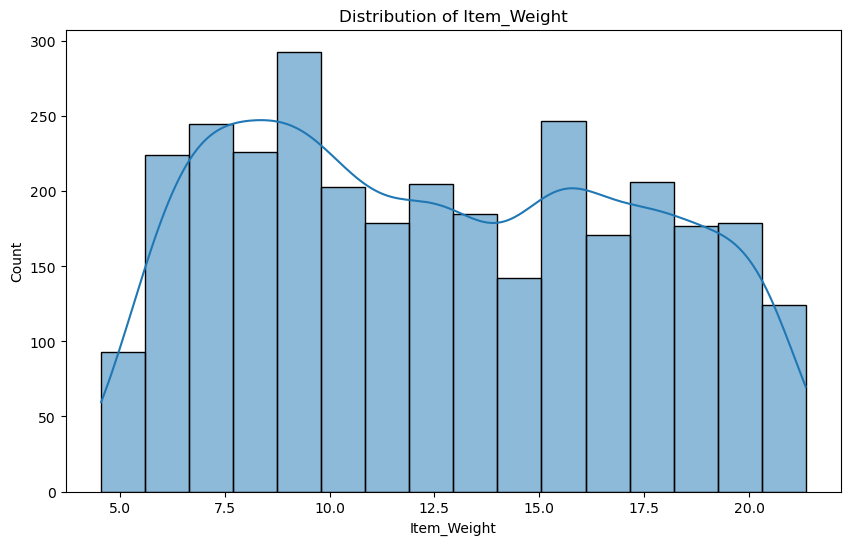

Item_Weight-Mean: 12.66, SD:4.62


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


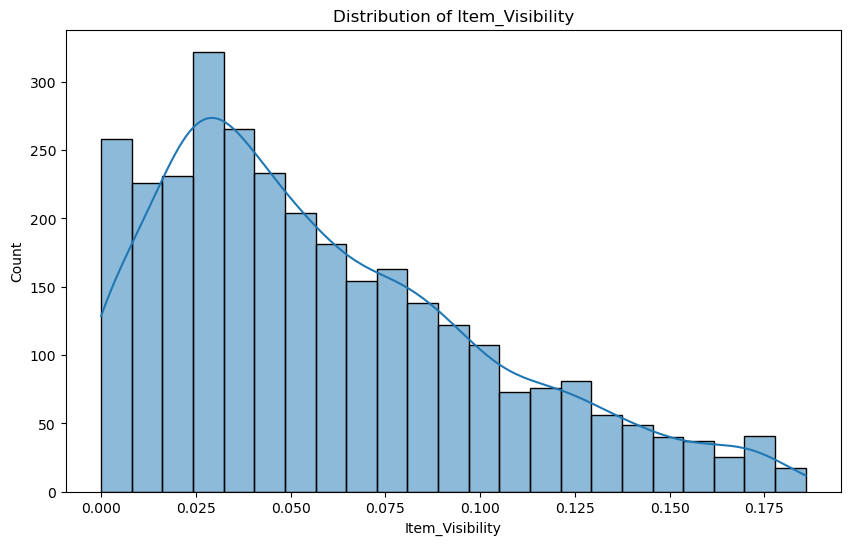

Item_Visibility-Mean: 0.06, SD:0.04


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


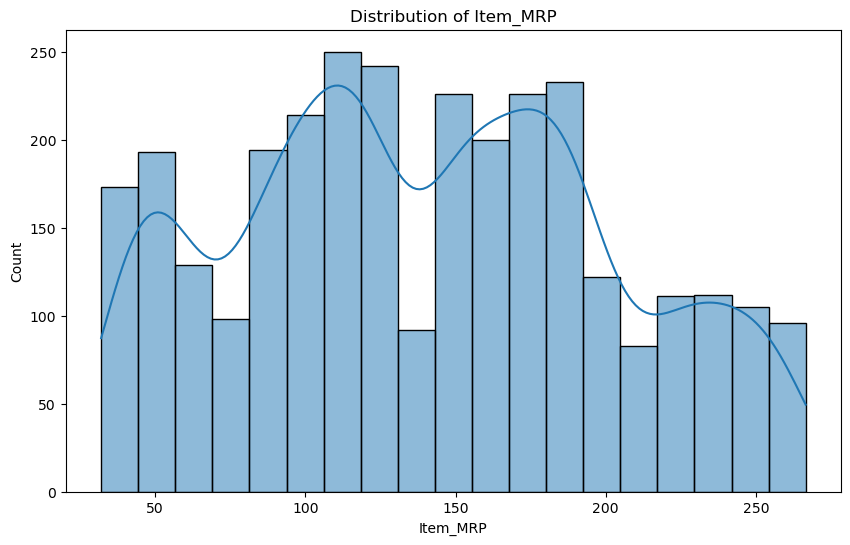

Item_MRP-Mean: 140.04, SD:61.61


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


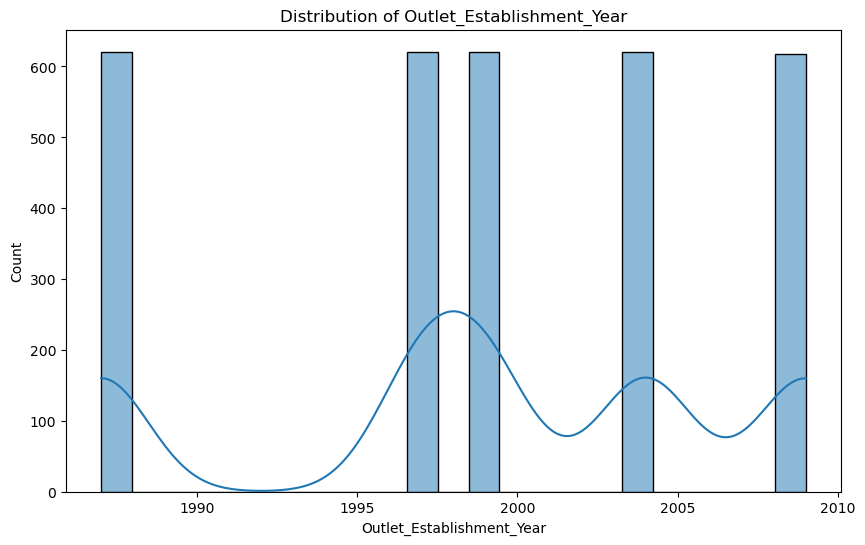

Outlet_Establishment_Year-Mean: 1999.19, SD:7.39


In [76]:
for col in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    print(f"{col}-Mean: {df[col].mean():.2f}, SD:{df[col].std():.2f}")

In [77]:
#Measures of Cenetral Tendency
for col in numerical_columns:
    print(f"{col}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode()[0]:.2f}\n")

Item_Weight:
Mean: 12.66
Median: 12.35
Mode: 10.50

Item_Visibility:
Mean: 0.06
Median: 0.05
Mode: 0.00

Item_MRP:
Mean: 140.04
Median: 141.32
Mode: 57.06

Outlet_Establishment_Year:
Mean: 1999.19
Median: 1999.00
Mode: 1987.00



In [78]:
#Measures of Dispersion
for col in numerical_columns:
    print(f"{col}:")
    print(f"Range: {df[col].max() - df[col].min():.2f}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Coefficient of Variation: {(df[col].std() / df[col].mean()) * 100:.2f}\n")

Item_Weight:
Range: 16.80
Variance: 21.32
Coefficient of Variation: 36.47

Item_Visibility:
Range: 0.19
Variance: 0.00
Coefficient of Variation: 73.81

Item_MRP:
Range: 234.60
Variance: 3795.56
Coefficient of Variation: 43.99

Outlet_Establishment_Year:
Range: 22.00
Variance: 54.58
Coefficient of Variation: 0.37



## Box Plots for Numerical Variables

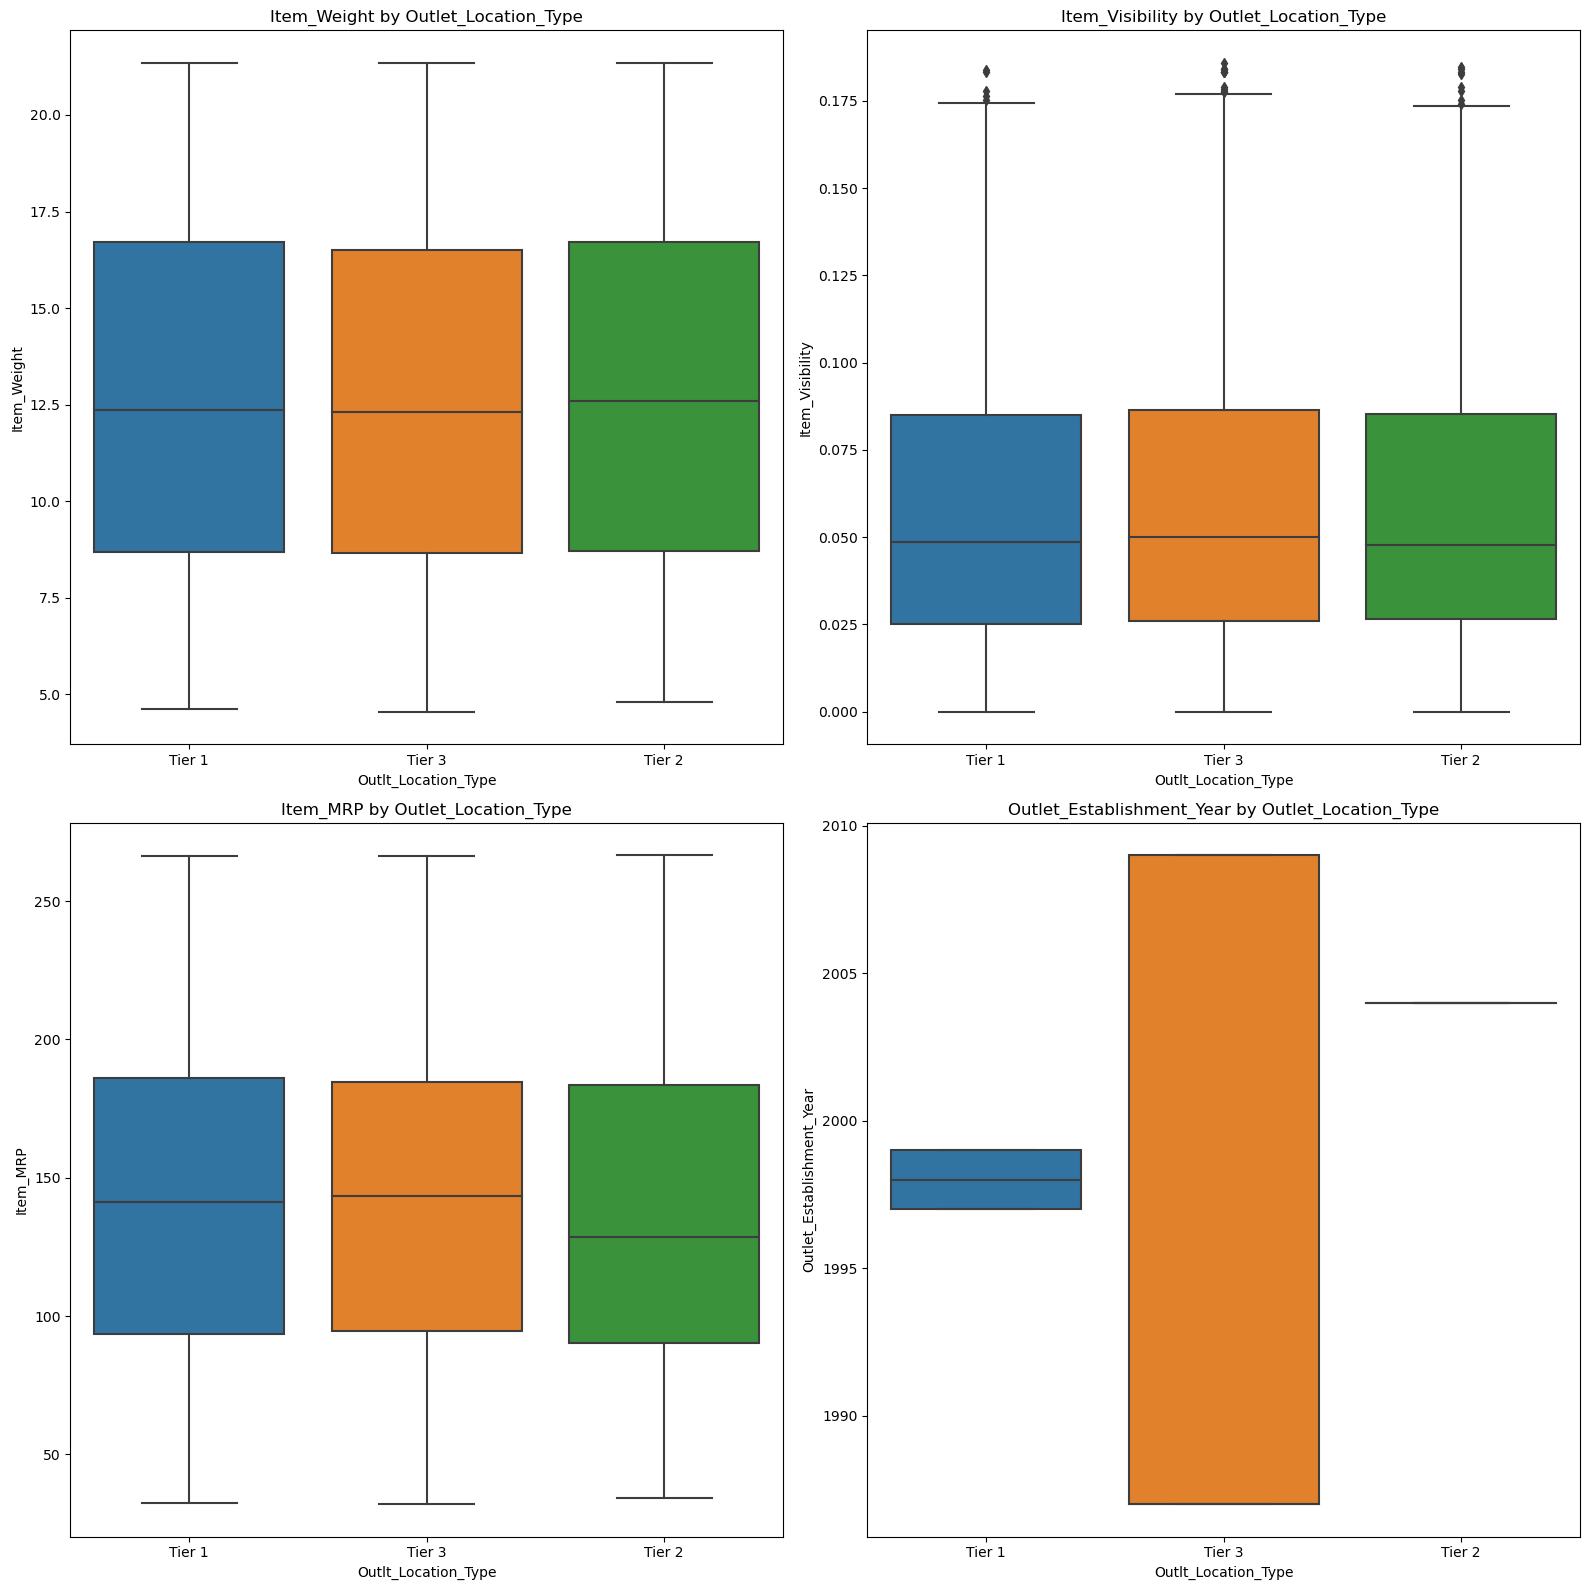

In [80]:
#Boxplot
fig,axes=plt.subplots(2,2,figsize=(16,16))
axes=axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df,x='Outlet_Location_Type',y=col,ax=axes[i])
    axes[i].set_title(f'{col} by Outlet_Location_Type')
    axes[i].set_xlabel('Outlt_Location_Type')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

(array([560., 856., 678., 595., 410.]),
 array([ 31.99   ,  78.90968, 125.82936, 172.74904, 219.66872, 266.5884 ]),
 <BarContainer object of 5 artists>)

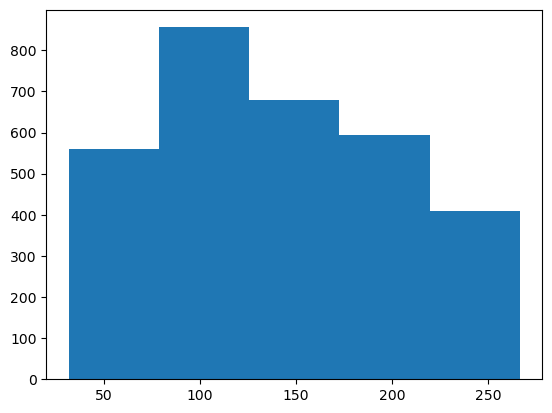

In [84]:
# histogram
import matplotlib.pyplot as plt
plt.hist(df['Item_MRP'],bins=5)

## Categorical variaaable Visualization

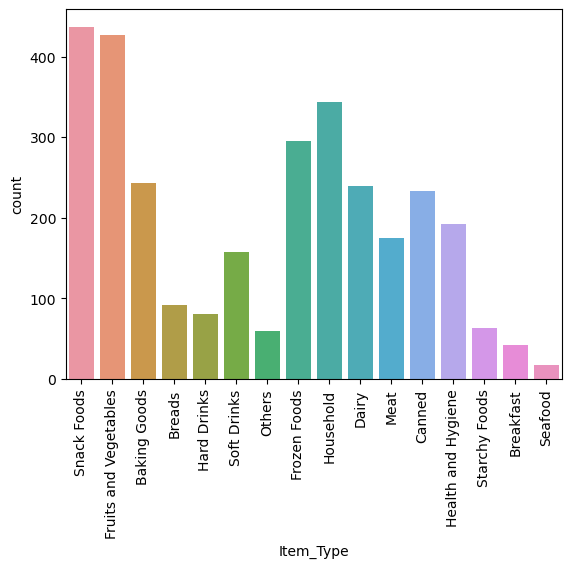

In [85]:
sns.countplot(x='Item_Type',data=df)
plt.xticks(rotation=90)  # Rotate labels by 90 degrees
plt.show()

In [87]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0            FDW58       20.750          Low Fat         0.007565   
5            FDH56        9.800          Regular         0.063817   
6            FDL48       19.350          Regular         0.082602   
13           FDU11        4.785          Low Fat         0.092738   
14           DRL59       16.750               LF         0.021206   

                Item_Type  Item_MRP Outlet_Identifier  \
0             Snack Foods  107.8622            OUT049   
5   Fruits and Vegetables  117.1492            OUT046   
6            Baking Goods   50.1034            OUT018   
13                 Breads  122.3098            OUT049   
14            Hard Drinks   52.0298            OUT013   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                        1999      Medium               Tier 1   
5                        1997       Small               Tier 1   
6                        2009      Medium               Tier 3   
13                       1999      Medium               Tier 1   
14                       1987        High               Tier 3   

          Outlet_Type  Item_Fat_Content_Encoded  Item_Type_Encoded  \
0   Supermarket Type1                         1                 13   
5   Supermarket Type1                         2                  6   
6   Supermarket Type2                         2                  0   
13  Supermarket Type1                         1                  1   
14  Supermarket Type1                         0                  7   

    Outlet_Size_Encoded  Outlet_Type_Encoded  
0                     1                    0  
5                     2                    0  
6                     1                    1  
13                    1                    0  
14                    0                    0

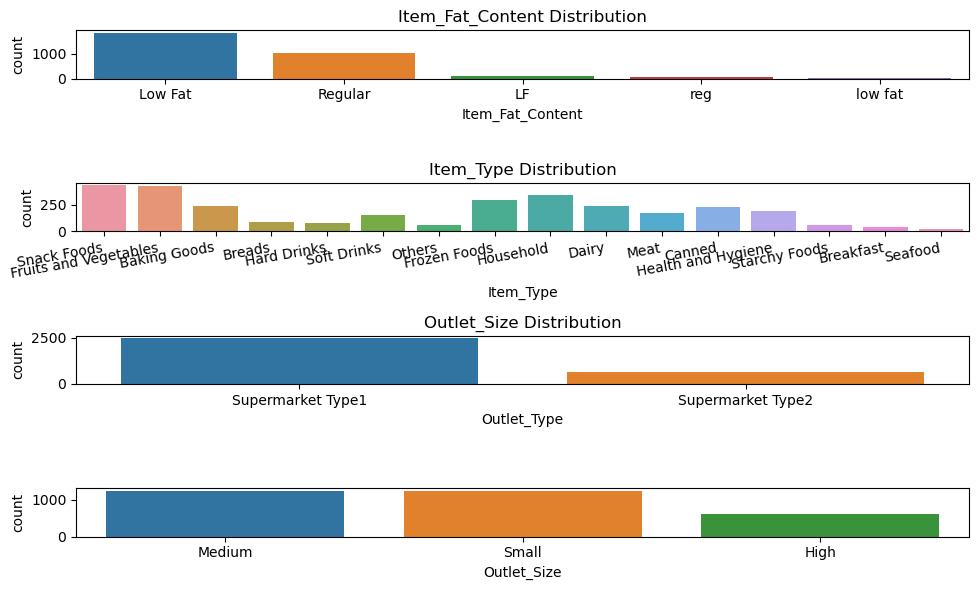

In [86]:
fig, axes = plt.subplots(4,1, figsize=(10, 6))

sns.countplot(data=df, x='Item_Fat_Content', ax=axes[0])
axes[0].set_title('Item_Fat_Content Distribution')

sns.countplot(data=df, x='Item_Type', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=10, ha="right")
axes[1].set_title('Item_Type Distribution')


sns.countplot(data=df, x='Outlet_Type', ax=axes[2])
axes[2].set_title('Outlet_Type Distribution')

sns.countplot(data=df, x='Outlet_Size', ax=axes[3])
axes[2].set_title('Outlet_Size Distribution')

plt.tight_layout()
plt.show()

In [88]:
print(df['Item_Type'].unique())

['Snack Foods' 'Fruits and Vegetables' 'Baking Goods' 'Breads'
 'Hard Drinks' 'Soft Drinks' 'Others' 'Frozen Foods' 'Household' 'Dairy'
 'Meat' 'Canned' 'Health and Hygiene' 'Starchy Foods' 'Breakfast'
 'Seafood']


### Skewness and Kurtosis

In [89]:
from scipy.stats import skew, kurtosis

for col in numerical_columns:
    print(f"{col}:")
    print(f"Skewness: {skew(df[col]):.2f}")
    print(f"Kurtosis: {kurtosis(df[col]):.2f}\n")

Item_Weight:
Skewness: 0.14
Kurtosis: -1.21

Item_Visibility:
Skewness: 0.79
Kurtosis: -0.07

Item_MRP:
Skewness: 0.13
Kurtosis: -0.90

Outlet_Establishment_Year:
Skewness: -0.38
Kurtosis: -0.86



### Kernal Density Distribution 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

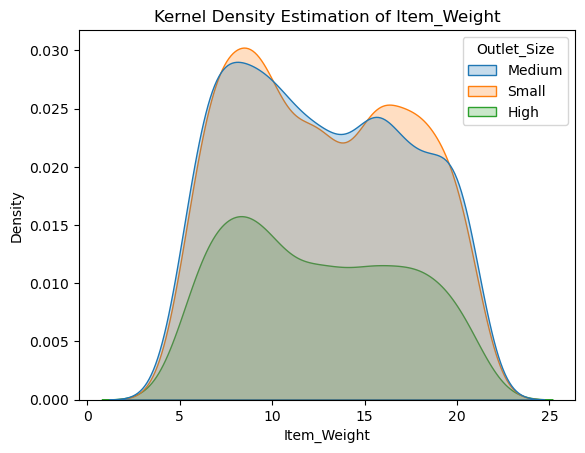

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

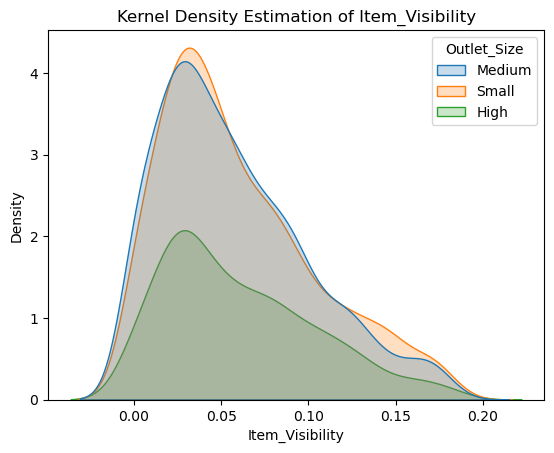

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

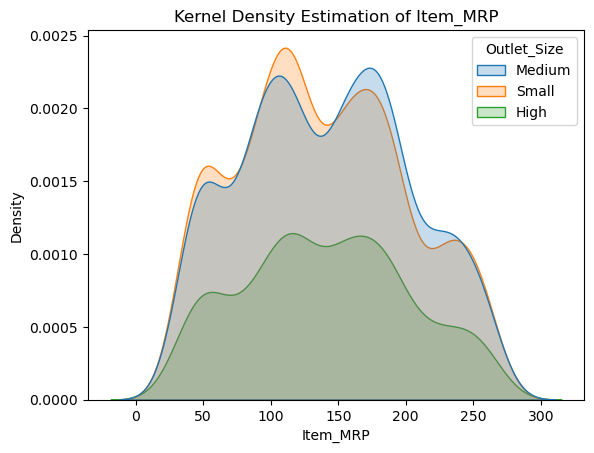

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\MAYUR ARYA\AppData\Local\Temp\ipykernel_16512\2810995811.py:2: UserWarning: Dataset has 0 variance;

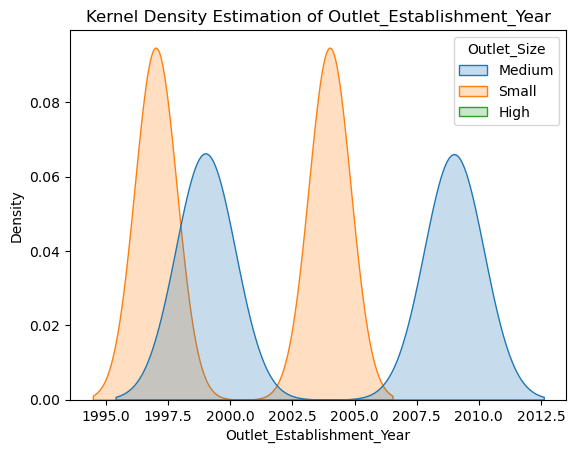

In [90]:
for col in numerical_columns:
    sns.kdeplot(data=df, x=col, hue='Outlet_Size', fill=True)
    plt.title(f'Kernel Density Estimation of {col}')
    plt.show()

### Outliers using IQR

In [91]:
# Detect outliers using IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values outside 1.5*IQR
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 Item_Weight                   0
Item_Visibility              26
Item_MRP                      0
Outlet_Establishment_Year     0
dtype: int64


In [92]:
categorical_cols = ["Item_Fat_Content","Item_Type","Outlet_Type"]

# Display value counts for each categorical column
for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n\n")

Value counts for Item_Fat_Content:
Item_Fat_Content
Low Fat    1868
Regular    1045
LF          108
reg          46
low fat      32
Name: count, dtype: int64


Value counts for Item_Type:
Item_Type
Snack Foods              437
Fruits and Vegetables    427
Household                344
Frozen Foods             296
Baking Goods             243
Dairy                    240
Canned                   233
Health and Hygiene       192
Meat                     175
Soft Drinks              158
Breads                    92
Hard Drinks               81
Starchy Foods             63
Others                    59
Breakfast                 42
Seafood                   17
Name: count, dtype: int64


Value counts for Outlet_Type:
Outlet_Type
Supermarket Type1    2481
Supermarket Type2     618
Name: count, dtype: int64




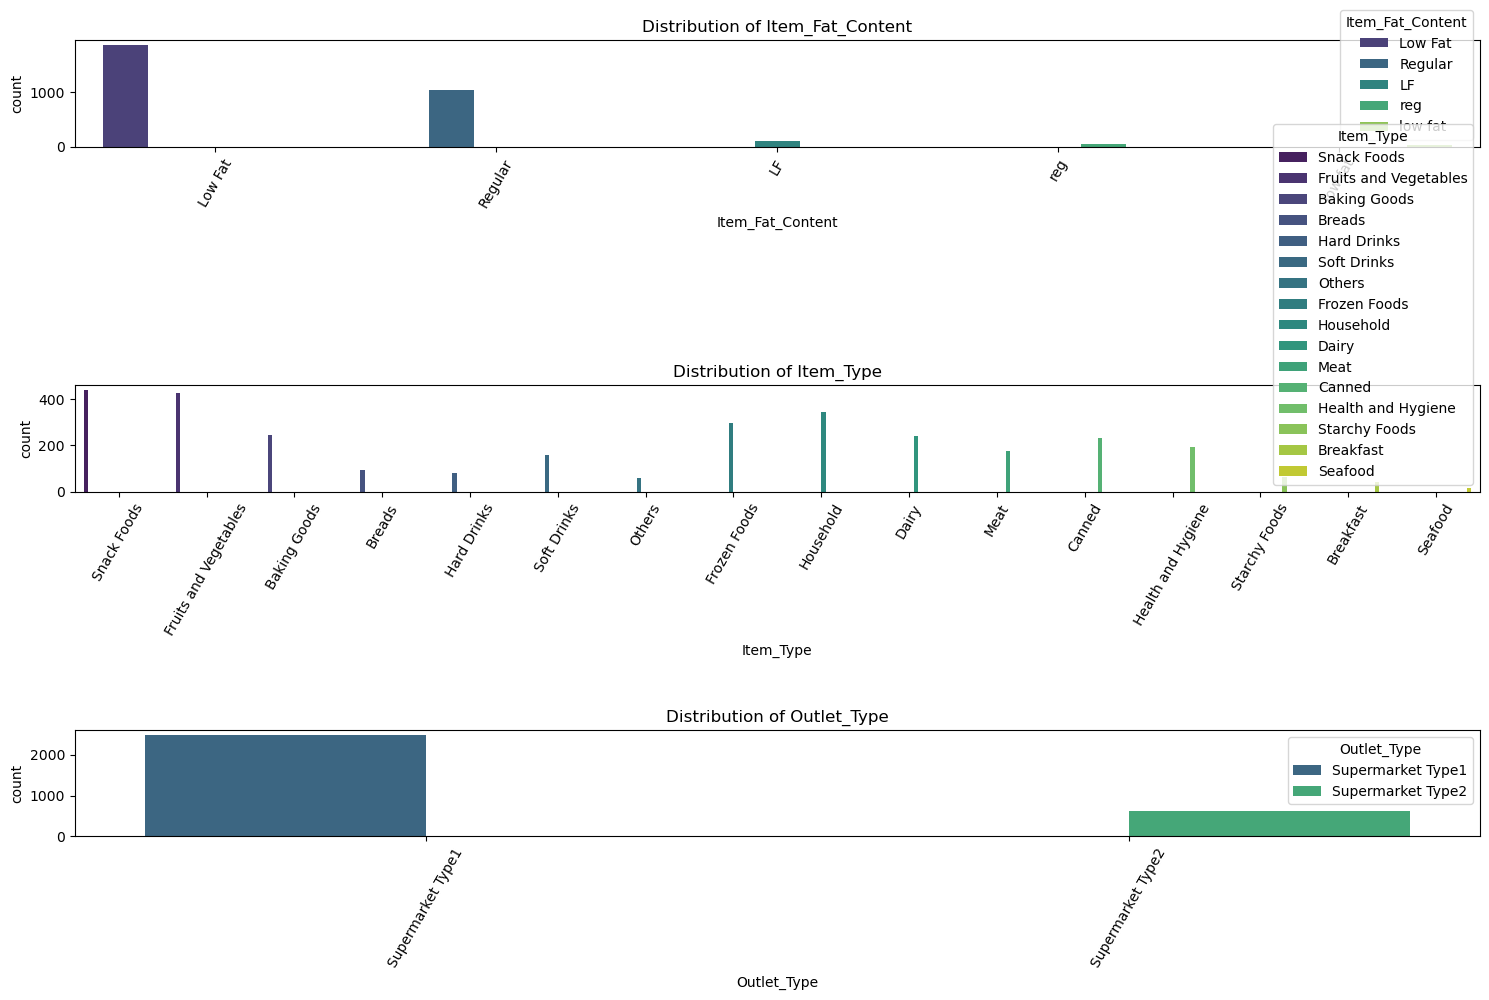

In [93]:
#plot bar charts fot categorical features
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols,1):
    plt.subplot(3,1,i)
    sns.countplot(data=df,x=col,hue=col,palette="viridis")
    plt.xticks(rotation=60)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

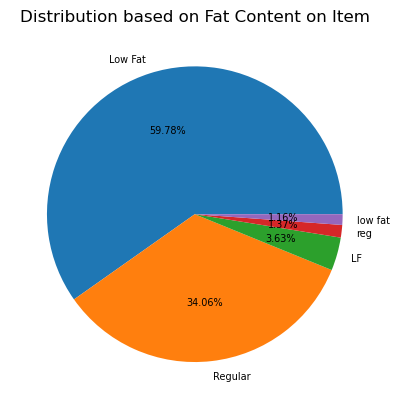

In [32]:
# pie chart for categorical variables
df['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%1.2f%%',fontsize='7')
plt.title("Distribution based on Fat Content on Item")
plt.ylabel('')
plt.show()

In [33]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


Text(0.5, 1.0, 'Distribution based on Outlet Location Type')

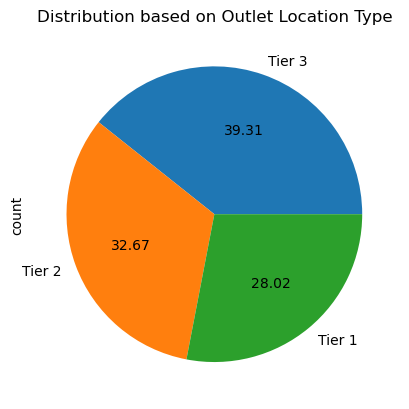

In [34]:
#piechart for Outlet Location Type
df['Outlet_Location_Type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Distribution based on Outlet Location Type')

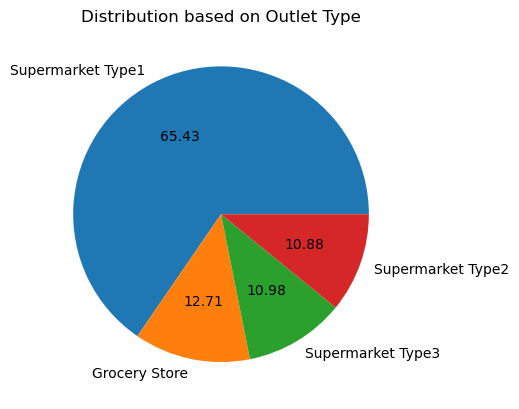

In [35]:
#piechart  for Outlet Type 
df['Outlet_Type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Distribution based on Outlet Type")
plt.ylabel('')
plt.show()

## MULTIVARIATE ANALYSIS

### Correlation Matrix (Numerical Variables only)

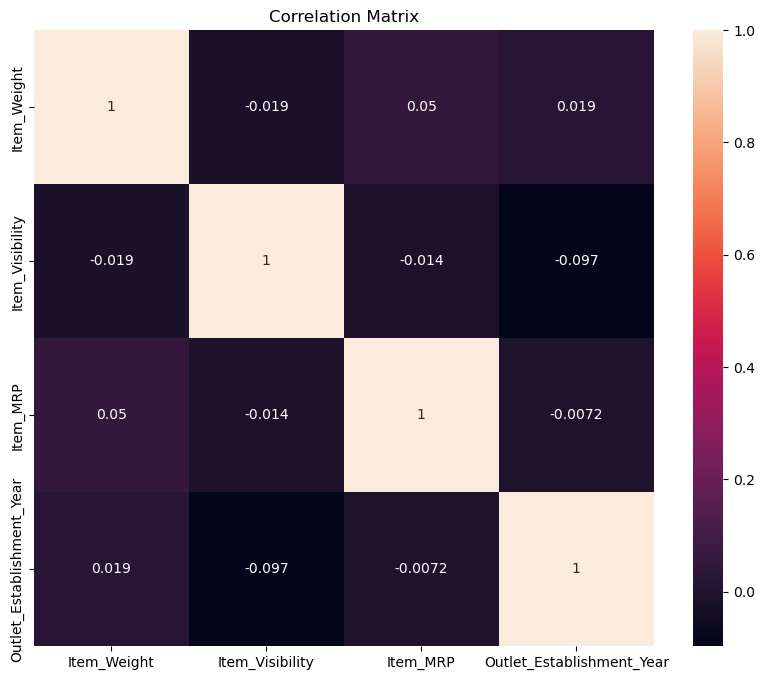

In [37]:
corr_matrix=df[numerical_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix')
plt.show()

### Scatter plot with Regression Lines

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

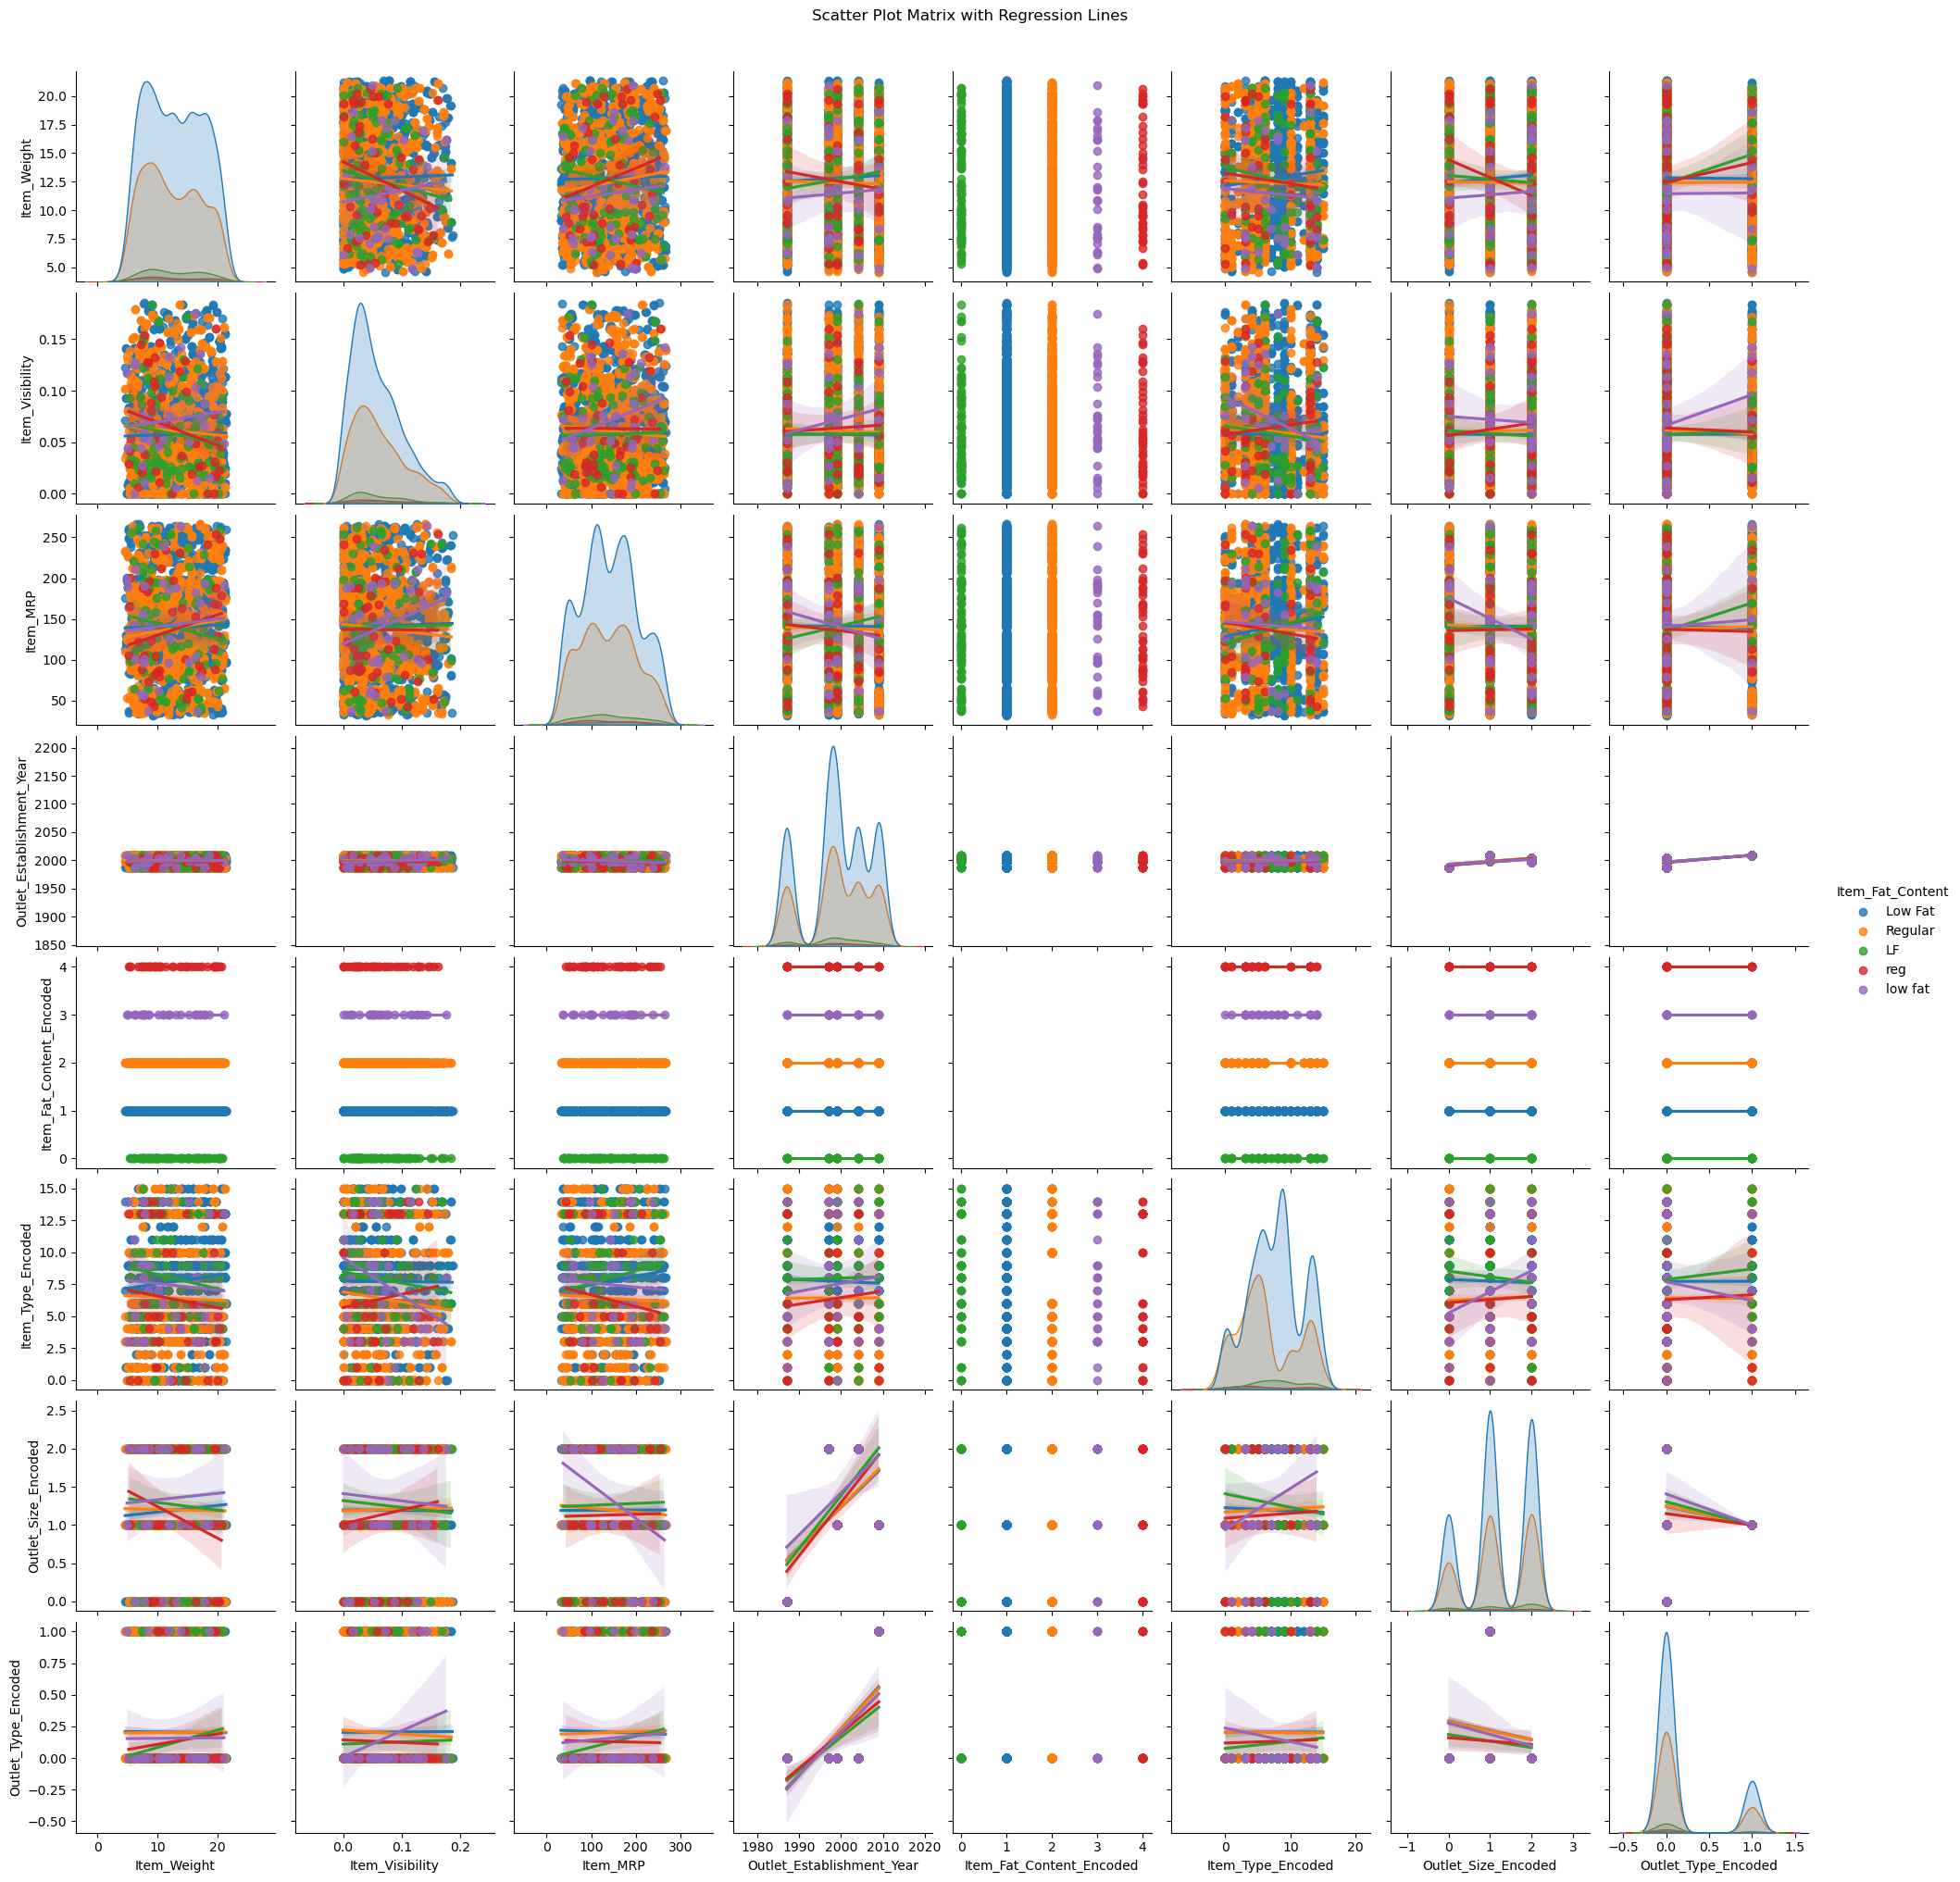

In [94]:
sns.pairplot(df,hue='Item_Fat_Content',kind='reg')
plt.suptitle('Scatter Plot Matrix with Regression Lines',y=1.02)
plt.show()

### Pairplot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

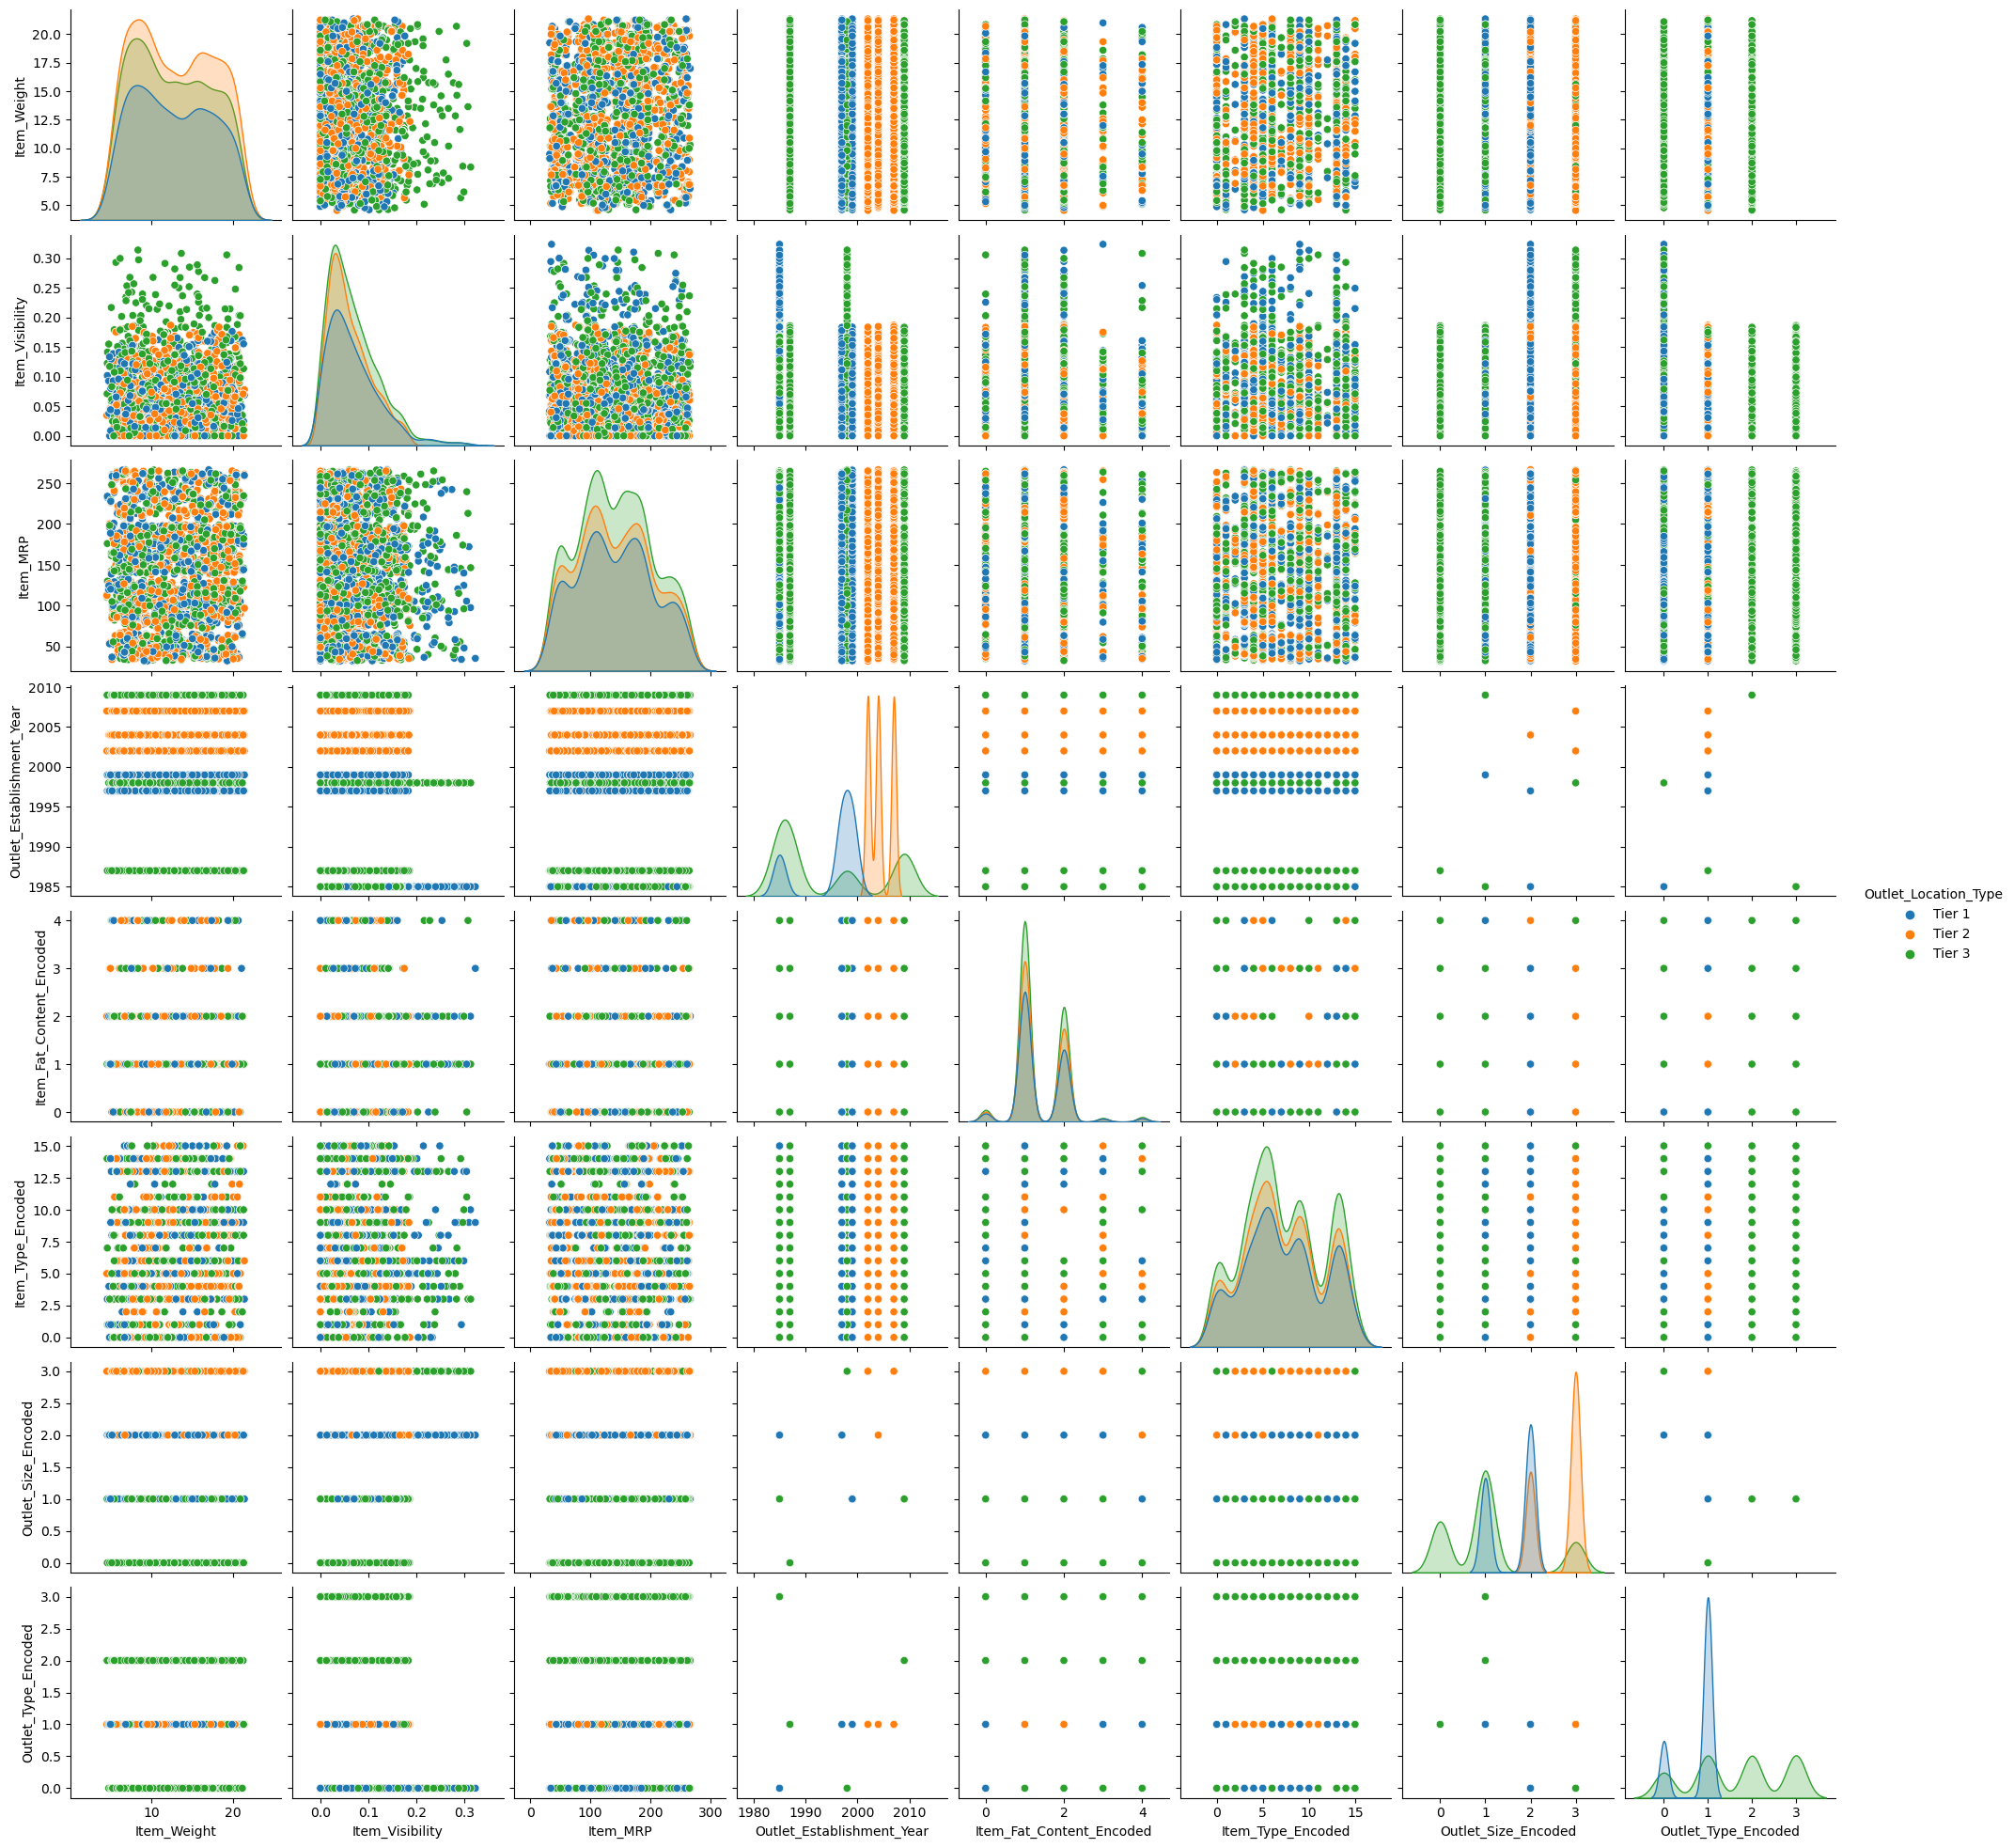

In [42]:
sns.pairplot(df,hue='Outlet_Location_Type',diag_kind="kde")
plt.show()

### Violin Plot

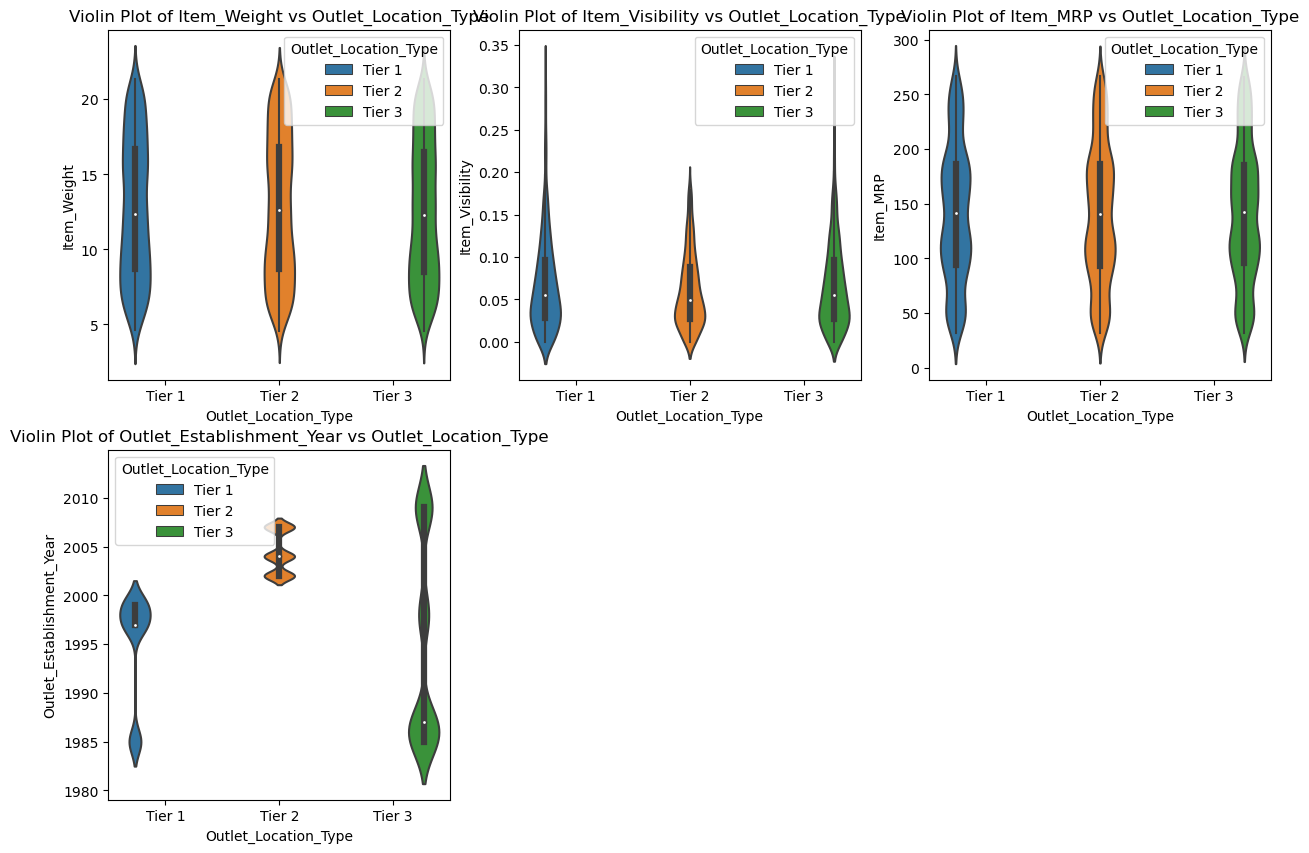

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

#list of numerical features to plot
numerical_features=["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_features,1):
    plt.subplot(2,3,i)
    sns.violinplot(x='Outlet_Location_Type',y=col,data=df,hue='Outlet_Location_Type',legend=False)
    plt.title(f"Violin Plot of {col} vs Outlet_Location_Type")
    
plt.show()

### Faced Histogram

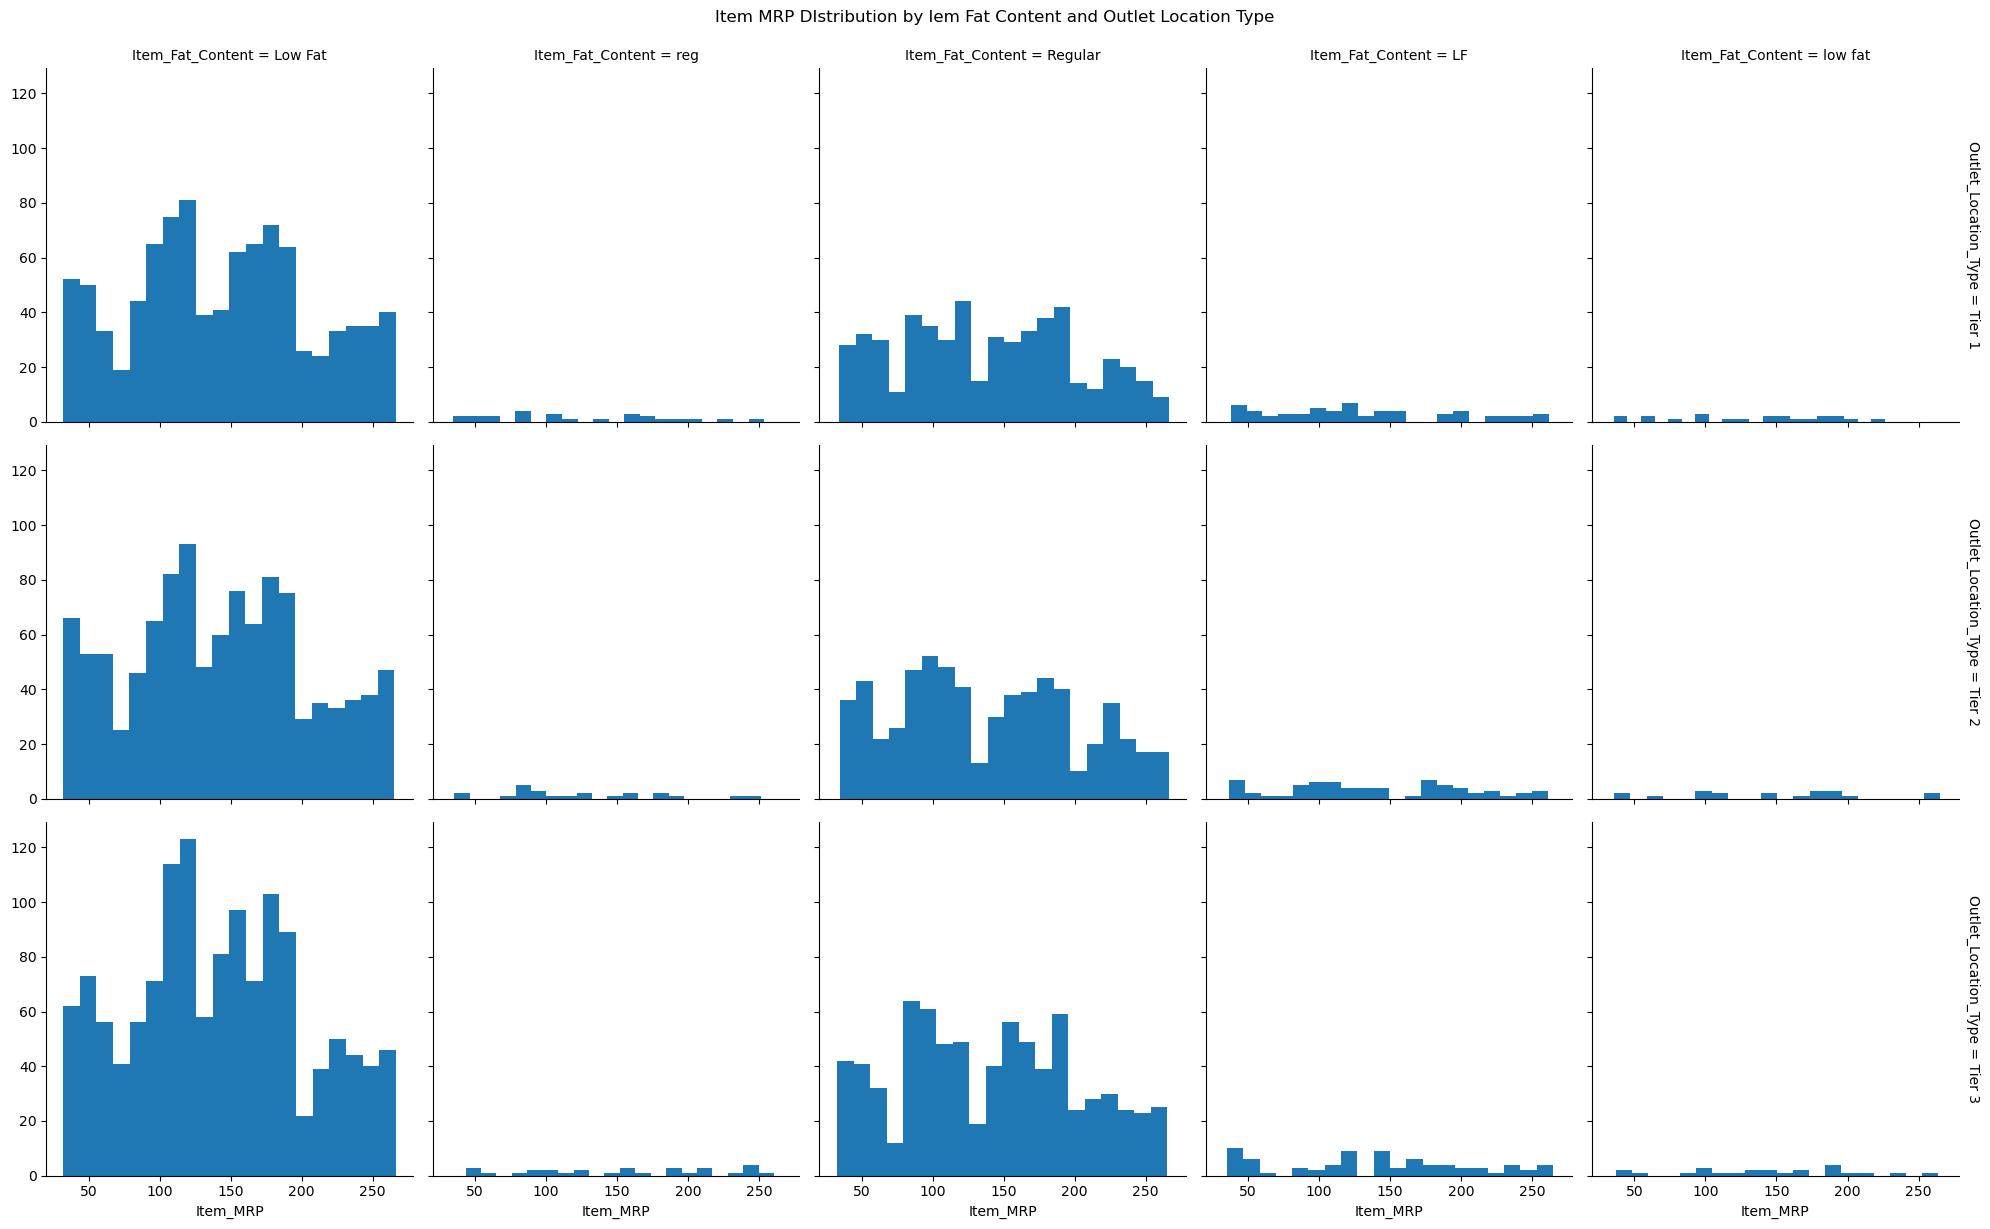

In [46]:
g=sns.FacetGrid(df,col='Item_Fat_Content',row='Outlet_Location_Type',margin_titles=True,height=4)
g.map(plt.hist,"Item_MRP",bins=20)
g.fig.suptitle("Item MRP DIstribution by Iem Fat Content and Outlet Location Type",y=1.02)
plt.show()

### 3D Scatter Plot

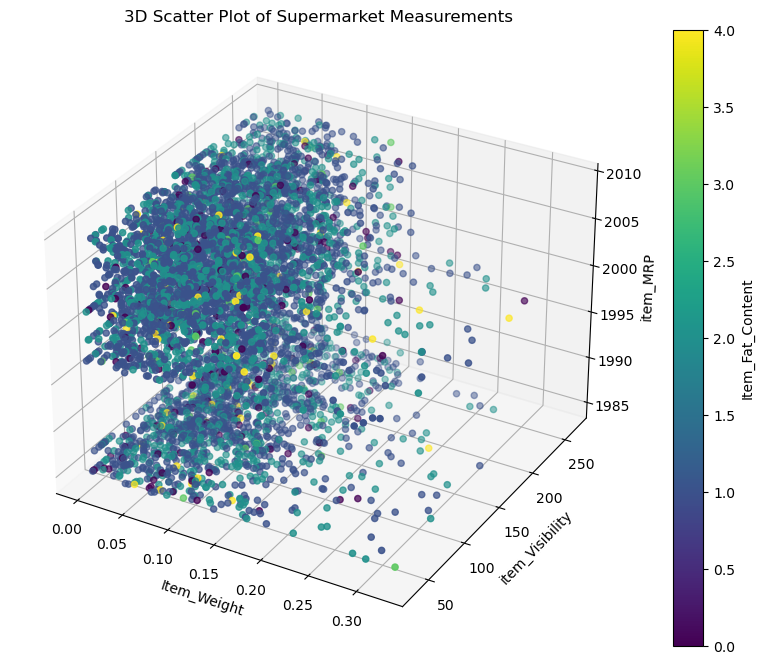

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')

scatter =ax.scatter(
                   df['Item_Visibility'],
                   df['Item_MRP'],
                   df['Outlet_Establishment_Year'],
                   c=df['Item_Fat_Content_Encoded'])

ax.set_xlabel('Item_Weight')
ax.set_ylabel('item_Visibility')
ax.set_zlabel('item_MRP')
ax.set_title('3D Scatter Plot of Supermarket Measurements')

plt.colorbar(scatter,label='Item_Fat_Content')
plt.show()

### Correlation

In [53]:
from scipy.stats import pointbiserialr

# 'Item_Fat_Content' is target variable
# Converting 'Item_Fat_Content' to binary (e.g., Adelie vs. non-Adelie)
df['Item_Fat_Content_binary'] = (df['Item_Fat_Content'] == 'Low Fat').astype(int)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if col != "Item_Fat_Content_binary":
        correlation, p_value = pointbiserialr(df[col], df["Item_Fat_Content_binary"])
        print(f"Correlation between {col} and Item_Fat_Content: {correlation:.2f} (p-value: {p_value:.3f})")

Correlation between Item_Weight and Item_Fat_Content: 0.04 (p-value: 0.019)
Correlation between Item_Visibility and Item_Fat_Content: -0.04 (p-value: 0.023)
Correlation between Item_MRP and Item_Fat_Content: 0.02 (p-value: 0.274)
Correlation between Outlet_Establishment_Year and Item_Fat_Content: 0.01 (p-value: 0.497)


C:\Users\MAYUR ARYA\AppData\Local\Temp\ipykernel_16512\3149322691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Fat_Content_binary'] = (df['Item_Fat_Content'] == 'Low Fat').astype(int)


### Chi-Square Test

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

cat_cols=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

for col in cat_cols:
    contingency_table=pd.crosstab(df[col],df['Item_Fat_Content'])
    chi2,p,dof,expected=chi2_contingency(contingency_table)
    print(f"Chi-Square for {col} vs Item_Fat_Content: p-value={p:3f}")

# Conclusion

In this anlaysis , we explorer the dataset in detail, indentifying key patterns and potential issues that need attention before using the data for further insights or predictions.Below are the major conclusion derived from the analysis:

### Data Quality Issues Identified:

Missing values were detected in Item_weight and outlet_size,which require imputation for a complete analysis.
Inconsistent categorical values were found in Item_Fat_content(e.g.low fat ,lf ,regular all represent the same category).

### Univariate Analysis Highlights

Item_Weight has a fairly uniform distribution, but missing values and outliers may impact model accuracy.

Item_Visibility is highly skewed, with many items having zero visibility, which needs correction.

Item_MRP follows a bimodal distribution, indicating the presence of two pricing segments (budget & premium products).

Outlet distribution shows that supermarkets dominate compared to grocery stores, which might influence sales.

### Multivariate Analysis Insights

Weak correlations exist between most numerical variables, suggesting independent factors drive sales.

Older outlets tend to have different item visibility trends, indicating possible variations in marketing or display strategies.

### Data quality and Reliabilty

The consistency of relationships across different analyses supports the reliability of the dataset and the robustness of the observed patterns